## 1주차 미션 소개 - 머신러닝 과정 이해하기

* 미션 목적
    * 머신러닝 모델을 실행하는 기본 과정을 이해하기 (학습 => 예측 => 평가)
    * Scikit-learn API 기본 사용법 익히기
    * 학습을 하기 위해 학습, 예측 데이터를 나누는 방법
    * 학습(train, 기출문제, 정답이 있음), 예측(test, 실전 문제, 정답이 없음)
    * 학습(fit)과 예측(predict)을 하고 평가를 하는 방법
    * 머신러닝 알고리즘 중에 좋은 성능을 내는 boosting 알고리즘의 기본이 되는 DecisionTree 를 사용
    * DecisionTree 의 기본적인 원리 이해하기
    
* 미션 데이터셋 소개

    * 해당 Kaggle 데이터셋( https://www.kaggle.com/blastchar/telco-customer-churn )은 통신사 고객 이탈(Churn)에 대한 정보를 담고 있습니다. IBM에서 제공한 이 데이터셋은 고객 유지에 필요한 행동을 예측하는 데 사용될 수 있으며, 고객 데이터를 분석하여 고객 유지 프로그램을 개발하는 데 도움이 됩니다.
    * 해당 데이터셋은 다음의 정보로 구성되어 있습니다.
        * 고객 인구 통계 정보(Demographic info): 고객의 성별, 연령대, 배우자 및 부양 가족의 유무(Gender, SeniorCitizen, Partner, Dependents) 등에 관한 정보가 포함되어 있습니다.
        * 고객 이탈(Churn) 정보: 서비스를 중단 여부에 대한 정보가 포함되어 있습니다.
        * 서비스 가입 정보(Services subscribed): 고객들이 가입한 서비스들, 예를 들어 전화, 다중 라인, 인터넷, 온라인 보안, 온라인 백업, 장치 보호, 기술 지원, 스트리밍 TV 및 영화( honeService, MultipleLine, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies) 등에 대한 정보가 있습니다.
        * 고객 계정 정보(Customer account info): 고객이 얼마나 오래 서비스를 이용했는지, 계약 유형, 결제 방법, 무페이퍼 청구 여부, 월별 요금, 총 요금 (CustomerID, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Tenure)등의 정보가 담겨 있습니다.


* 해당 미션으로 시도해 볼 수 있는 현실 세계 문제
    * 이탈 예측 모델링: 가장 일반적인 사용 사례로, 고객의 이탈 가능성을 예측하는 모델을 구축합니다. 이러한 모델은 고객의 과거 데이터와 행동 패턴을 분석하여 누가 이탈할 가능성이 높은지 예측합니다.

    * 고객 세분화: 고객을 다양한 그룹으로 세분화하여, 특정 그룹이 왜 더 높은 이탈률을 보이는지 이해할 수 있습니다. 이를 통해 타겟 마케팅 전략을 개발하거나 특정 고객 그룹에 더 맞춤화된 서비스를 제공할 수 있습니다.

    * 원인 분석: 머신러닝 모델을 사용하여 고객 이탈의 주요 원인을 파악할 수 있습니다. 예를 들어, 서비스 품질, 가격, 고객 서비스 경험 등 다양한 요인이 고객 이탈에 어떤 영향을 미치는지 분석할 수 있습니다. 피처의 중요도를 파악하고 어떤 요인이 이탈의 중요한 피처인지를 확인해 봅니다.

    * 추천 시스템 개선: 이탈 위험이 있는 고객에게 맞춤형 서비스나 제품을 추천하여 고객 만족도를 높이고 이탈률을 줄일 수 있습니다.

    * 고객 유지 전략 개발: 이탈 예측 모델을 활용해 고위험 고객을 식별하고, 이들을 대상으로 특별 프로모션, 개선된 고객 서비스, 맞춤형 커뮤니케이션 전략 등을 제공하여 이탈률을 줄일 수 있습니다.

    * 정책 및 서비스 개선: 모델에서 도출된 인사이트를 바탕으로 비즈니스 정책, 제품, 서비스를 개선하여 전반적인 고객 경험을 향상시킬 수 있습니다.



In [1]:
# 미션 진행을 위해 필요한 라이브러리를 로드합니다.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 미션 수행을 위해 데이터를 로드합니다.
df = pd.read_csv("https://bit.ly/telco-csv", index_col="customerID")
df.shape

(7043, 20)

In [3]:
# 숫자형태로 된 문자열을 숫자형으로 바꿔줍니다.
# 공백문자 등의 결측치가 들어있다면 .str.strip()을 통해 공백문자를 제거합니다.
# .replace("", np.nan) 는 공백문자를 결측치로 변경해 줍니다.
# .astype(float) 으로 수치형태로 변환해 줍니다.
df["TotalCharges"] = df["TotalCharges"].str.strip().replace("", np.nan).astype(float)

In [9]:
# 'MonthlyCharges' 열의 데이터 타입 확인
data_type = df['MonthlyCharges'].dtypes
print("Data type of 'MonthlyCharges' column:", data_type)


Data type of 'MonthlyCharges' column: float64


In [10]:
df["TotalCharges"].head(1)

customerID
7590-VHVEG    29.85
Name: TotalCharges, dtype: float64

In [11]:
# 결측치를 채워주는 방법도 있지만 일단 제거하도록 합니다.
# 결측치를 채우는 방법도 여러 가지가 있는데 여기에서는 결측치 11개는 그렇게 결측치가 많은 편이 아니고
# 임의의 수로 채워준다면 실제값과 유사한 값을 알아서 채워주지 않으면 오히려 예측의 성능이 떨어질 수 있습니다.
# 예를 들어 아무숫자로 채우기위해 0으로 채운다면 실제 낸 금액은 훨씬 많을텐데 모델을 더 혼란스럽게 만들 수 있습니다.
# 중간값, 평균값 등의 대푯값으로 채운다면 해당 데이터에서 제공하는
# 인구통계학적인 정보, 구독정보 등을 참고해서 해당 세그먼트에서의 대푯값으로 채우는 것을 추천합니다.
df = df.dropna()
df.isnull().sum().sum()

0

In [12]:
#Return Series with number of distinct elements. Can ignore NaN values.
nuniq = df.nunique()
print(nuniq)

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64


In [13]:
# 바이너리 변수 인코딩을 위해 범주 값이 2개로 되어 있어 이진값으로 인코딩이 가능한 변수를 찾습니다.
nuniq = df.nunique()
bi_cols = nuniq[nuniq == 2].index
bi_cols

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'PaperlessBilling', 'Churn'],
      dtype='object')

In [14]:
#값이 두개로만 이루어져 있는 아이들만 따로 출력
df[bi_cols]

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn
customerID,,,,,,,
7590-VHVEG,Female,0,Yes,No,No,Yes,No
5575-GNVDE,Male,0,No,No,Yes,No,No
3668-QPYBK,Male,0,No,No,Yes,Yes,Yes
7795-CFOCW,Male,0,No,No,No,No,No
9237-HQITU,Female,0,No,No,Yes,Yes,Yes
...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,Yes,Yes,No
2234-XADUH,Female,0,Yes,Yes,Yes,Yes,No
4801-JZAZL,Female,0,Yes,Yes,No,Yes,No


In [15]:
# 바이너리 변수에 대한 인코딩
df["gender_encode"] = (df["gender"] == "Male").astype(int) #male -> 1 female -> 0
df["Partner_encode"] = (df["Partner"] == "Yes").astype(int)
df["Dependents_encode"] = (df["Dependents"] == "Yes").astype(int)
df["PhoneService_encode"] = (df["PhoneService"] == "Yes").astype(int)
df["PaperlessBilling_encode"] = (df["PaperlessBilling"] == "Yes").astype(int)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_encode,Partner_encode,Dependents_encode,PhoneService_encode,PaperlessBilling_encode
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,Yes,Electronic check,29.85,29.85,No,0,1,0,0,1
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,Mailed check,56.95,1889.50,No,1,0,0,1,0
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,Yes,Mailed check,53.85,108.15,Yes,1,0,0,1,1
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,Bank transfer (automatic),42.30,1840.75,No,1,0,0,0,0
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,Yes,Electronic check,70.70,151.65,Yes,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Mailed check,84.80,1990.50,No,1,1,1,1,1
2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,Yes,Credit card (automatic),103.20,7362.90,No,0,1,1,1,1
4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,Yes,Electronic check,29.60,346.45,No,0,1,1,0,1


In [16]:
# 정답의 빈도수 확인
df["Churn"].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

In [17]:
# value_counts(1) => normalize=True 와 같습니다.
df["Churn"].value_counts(1) #즉 1을 넣으면 빈도가 아닌 비율을 리턴

Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64

<Axes: xlabel='Churn', ylabel='count'>

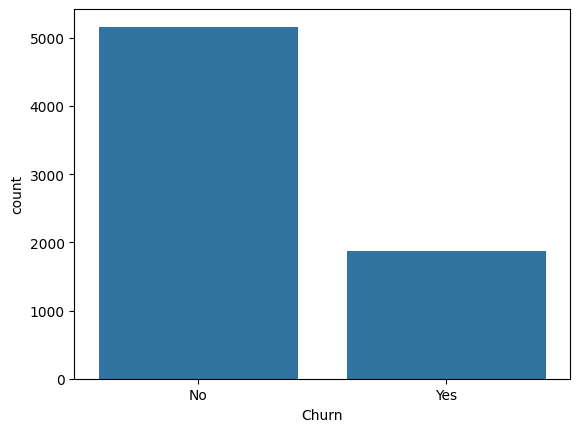

In [18]:
sns.countplot(data=df, x="Churn")

### 범주형 데이터의 범주 만들어주기

In [19]:
df['MonthlyCharges_category'] = pd.qcut(df['MonthlyCharges'], q=[0, 0.25, 0.5, 0.75, 1], labels=False)

In [20]:
df['TotalCharges_category'] = pd.qcut(df['TotalCharges'], q=[0, 0.25, 0.5, 0.75, 1], labels=False)

In [21]:
test = df.select_dtypes(include='number').columns
print(test)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_encode', 'Partner_encode', 'Dependents_encode',
       'PhoneService_encode', 'PaperlessBilling_encode',
       'MonthlyCharges_category', 'TotalCharges_category'],
      dtype='object')


In [ ]:
df["PaperlessBilling_encode"] = (df["PaperlessBilling"] == "Yes").astype(int)

In [26]:
# 학습, 예측에 사용할 컬럼에 이름 지정합니다.
# 범주형 데이터(object, category)는 전처리가 따로 필요합니다.
# 간단하게 모델을 만들어보기 위해 수치 데이터만 사용합니다.
feature_names = df.select_dtypes(include="number").columns #숫자형 데이터 타입만을 포함하는 컬럼들을 가지고 새로운 feature 생성
feature_names

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_encode', 'Partner_encode', 'Dependents_encode',
       'PhoneService_encode', 'PaperlessBilling_encode',
       'MonthlyCharges_category', 'TotalCharges_category'],
      dtype='object')

In [34]:
# 학습, 예측에 사용할 컬럼에 이름 지정합니다.
# 범주형 데이터(object, category)는 전처리가 따로 필요합니다.
# 간단하게 모델을 만들어보기 위해 수치 데이터만 사용합니다.
feature_names = df.select_dtypes(include="object").columns #숫자형 데이터 타입만을 포함하는 컬럼들을 가지고 새로운 feature 생성
feature_names

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

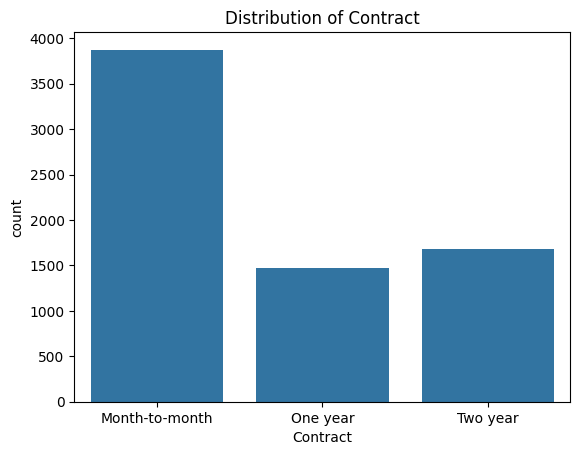

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# 'Contract' 열의 범주별 빈도수 시각화
sns.countplot(x='Contract', data=df)
plt.title('Distribution of Contract')
plt.show()


In [37]:
df_onehot = pd.get_dummies(df, columns=['Contract'], prefix=['Contract'])
df_onehot

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,gender_encode,Partner_encode,Dependents_encode,PhoneService_encode,PaperlessBilling_encode,MonthlyCharges_category,TotalCharges_category,Contract_Month-to-month,Contract_One year,Contract_Two year
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,0,1,0,0,1,0,0,True,False,False
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,1,0,0,1,0,1,2,False,True,False
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,1,0,0,1,1,1,0,True,False,False
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,1,0,0,0,0,1,2,False,True,False
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,0,0,0,1,1,2,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,1,1,1,1,1,2,2,False,True,False
2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,0,1,1,1,1,3,3,False,True,False
4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,0,1,1,0,1,0,0,True,False,False


In [54]:
df_onehot["Contract_Month-to-month_encode"] = (df_onehot["Contract_Month-to-month"] == "True").astype(int)
df_onehot["Contract_One year_encode"] = (df_onehot["Contract_One year"] == "True").astype(int)
df_onehot["Contract_Two year_encode"] = (df_onehot["Contract_Two year"] == "True").astype(int)

In [55]:
feature_names = df_onehot.select_dtypes(include="number").columns #숫자형 데이터 타입만을 포함하는 컬럼들을 가지고 새로운 feature 생성
feature_names

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_encode', 'Partner_encode', 'Dependents_encode',
       'PhoneService_encode', 'PaperlessBilling_encode',
       'MonthlyCharges_category', 'TotalCharges_category',
       'Contract_Month-to-month_encode', 'Contract_One year_encode',
       'Contract_Two year_encode'],
      dtype='object')

### 정답값이자 예측해야 될 값

In [56]:
# label_name 이라는 변수에 예측할 컬럼(Churn)의 이름을 담습니다.
label_name = "Churn"
label_name

'Churn'

In [65]:
feature_names

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_encode', 'Partner_encode', 'Dependents_encode',
       'PhoneService_encode', 'PaperlessBilling_encode',
       'MonthlyCharges_category', 'TotalCharges_category',
       'Contract_Month-to-month_encode', 'Contract_One year_encode',
       'Contract_Two year_encode'],
      dtype='object')

In [66]:
# 'MonthlyCharges_category', 'TotalCharges_category' 열 제거
df_onehot = df_onehot.drop(['MonthlyCharges_category', 'TotalCharges_category'], axis=1)


In [67]:
feature_names = df_onehot.select_dtypes(include="number").columns #숫자형 데이터 타입만을 포함하는 컬럼들을 가지고 새로운 feature 생성
feature_names

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_encode', 'Partner_encode', 'Dependents_encode',
       'PhoneService_encode', 'PaperlessBilling_encode',
       'Contract_Month-to-month_encode', 'Contract_One year_encode',
       'Contract_Two year_encode'],
      dtype='object')

In [68]:
# X, y를 만들어 줍니다.
# 물음표를 채워 독립변수(X)와 종속변수(y)를 나눠주세요.
# scikit-learn에서 데이터는 대문자 X(2차원,행렬)로 표시하고 정답은 소문자 y(1차원,벡터)로 표기합니다.
#X = df[['SeniorCitizen','tenure','MonthlyCharges','TotalCharges','gender_encode','Partner_encode','Dependents_encode','PhoneService_encode','PaperlessBilling_encode']]
X = df_onehot[feature_names]
y = df_onehot[label_name]
display(X.head(2))
display(y.head(2))

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_encode,Partner_encode,Dependents_encode,PhoneService_encode,PaperlessBilling_encode,Contract_Month-to-month_encode,Contract_One year_encode,Contract_Two year_encode
customerID,,,,,,,,,,,,
7590-VHVEG,0,1,29.85,29.85,0,1,0,0,1,0,0,0
5575-GNVDE,0,34,56.95,1889.50,1,0,0,1,0,0,0,0


customerID
7590-VHVEG    No
5575-GNVDE    No
Name: Churn, dtype: object

In [69]:
# 데이터의 행과 열의 개수를 확인합니다.
#행은 7032개 열은 25개
df.shape

(7032, 27)

In [70]:
# train 과 test 로 나누기 위해 데이터를 기준을 정합니다.
split_count = int(df.shape[0] * 0.8)
split_count

5625

* 다음 빈칸을 채워 학습, 예측 데이터셋을 만들어 주세요.
* 빈칸을 채우는 방법 외 다른 방법으로 나눠도 됩니다.

In [71]:
# 데이터의 80%을 나눌 기준 인덱스(split_count)로 문제 데이터(X)를 train, test로 나눕니다.
# 데이터의 80%을 나눌 기준 인덱스(split_count)로 정답 데이터(y)를 train, test로 나눕니다.
X_train = X[:split_count]
y_train = y[:split_count]

X_test = X[split_count:]
y_test = y[split_count:]

print("* 데이터가 잘 나뉘었는지 shape 값을 통해 확인해 보세요.")

X_train.shape, X_test.shape, y_train.shape, y_test.shape

* 데이터가 잘 나뉘었는지 shape 값을 통해 확인해 보세요.


((5625, 12), (1407, 12), (5625,), (1407,))

* 머신러닝 모델의 성능을 개선하는 방법
    * 데이터 분할
    * 데이터 전처리, 결측치 처리
    * 피처 선택, 피처 엔지니어링(스케일링, 변환, 인코딩 등)
    * 모델의 `파라미터 값을 변경하는 방법`
    
* <font color="red">머신러닝 알고리즘 모델을 통한 학습과 예측을 해주세요.</font>

In [72]:
# 사이킷런(sklearn)에서 의사 결정 트리 분류모델(DecisionTreeClassifier)을 로드합니다.
# 위 설명에서 제시한 주요 파라미터의 설정을 변경해서 모델을 만들어 주세요.
# 기본값으로 모델을 만들어도 되며 여러 파라미터를 변경하는 방법으로 만들어도 됩니다.

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion="gini",
                               max_depth=15,
                               max_features=0.9,
                               random_state=42)

In [73]:
# 데이터를 머신러닝 모델로 학습(fit)합니다.
# 기출문제 X_train 와 기출문제의 정답 y_train 을 넣고 학습을 합니다.
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, max_features=0.9, random_state=42)

In [48]:
import neptune

# 기본 실행 버전

/var/folders/v5/f_7vslxd3bj07chbkmd7nlkh0000gn/T/ipykernel_13635/4143115833.py:15: NeptuneWarning: The following monitoring options are disabled by default in interactive sessions: 'capture_stdout', 'capture_stderr', 'capture_traceback', and 'capture_hardware_metrics'. To enable them, set each parameter to 'True' when initializing the run. The monitoring will continue until you call run.stop() or the kernel stops. Also note: Your source files can only be tracked if you pass the path(s) to the 'source_code' argument. For help, see the Neptune docs: https://docs.neptune.ai/logging/source_code/
  run = neptune.init_run(


https://app.neptune.ai/songye/IBM-customer-data/e/IB-10


/Users/songye/opt/anaconda3/envs/aiffel2/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/songye/opt/anaconda3/envs/aiffel2/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/songye/opt/anaconda3/envs/aiffel2/lib/python3.11/site-packages/yellowbrick/classifier/classification_report.py:204: RuntimeWarning: invalid value encountered in divide
  scores[-1] = scores[-1] / scores[-1].sum()


Did not log ROC-AUC chart. Error y_true takes value in {'No', 'Yes'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.


/var/folders/v5/f_7vslxd3bj07chbkmd7nlkh0000gn/T/ipykernel_13635/4143115833.py:32: NeptuneUnsupportedType: You're attempting to log a type that is not directly supported by Neptune (<class 'NoneType'>).
        Convert the value to a supported type, such as a string or float, or use stringify_unsupported(obj)
        for dictionaries or collections that contain unsupported values.
        For more, see https://docs.neptune.ai/help/value_of_unsupported_type
  run["classifier"] = npt_utils.create_classifier_summary(


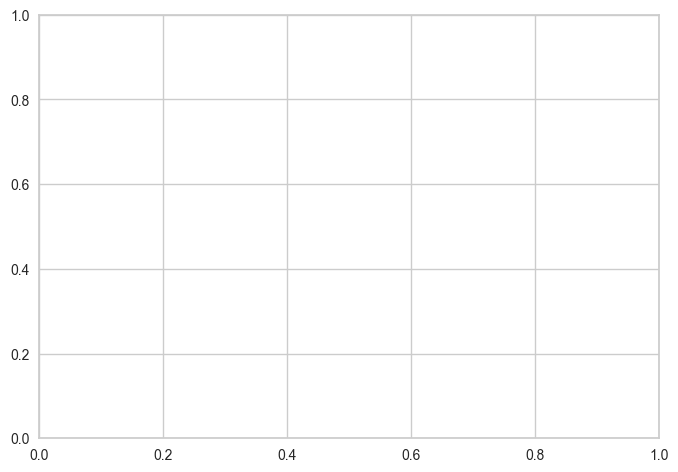

In [49]:
import neptune
import neptune.integrations.sklearn as npt_utils
from sklearn.tree import DecisionTreeClassifier


from dotenv import load_dotenv
import os

# .env 파일 로드
load_dotenv()

# API 키 가져오기
api_key = os.getenv("NEPTUNE_API_KEY")

run = neptune.init_run(
    project="songye/IBM-customer-data",
    api_token=api_key,
)  # your credentials

parameters = {
    "criterion": "entropy",
    "max_depth": 20,
    "max_features": 0.9,
    "random_state": 42,
}
run["parameters"] = parameters

model = DecisionTreeClassifier(**parameters)
model.fit(X_train, y_train)


run["classifier"] = npt_utils.create_classifier_summary(
    model, X_train, X_test, y_train, y_test
)

# gridSearch를 이용한 실행버전

## DecisionTreeClassifier를 이용한 버전

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [74]:
dt_classifier = DecisionTreeClassifier()

# 튜닝할 하이퍼 파라미터 설정
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2', 0.5],
    'criterion': ['gini', 'entropy']
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy',error_score='raise')

# 데이터에 모델을 fitting
grid_search.fit(X_train, y_train)


# 최적의 하이퍼 파라미터 출력
print("최적의 하이퍼 파라미터:", grid_search.best_params_)

# 최적의 모델로 평가
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("최적 모델의 정확도:", accuracy)

최적의 하이퍼 파라미터: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5}
최적 모델의 정확도: 0.7789623312011372


## RandomForestClassifier를 사용한 버전

## GradientBoostingClassifier를 이용한 방법

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# GradientBoostingClassifier 객체 생성
gb_classifier = GradientBoostingClassifier(random_state=42)

# 튜닝할 하이퍼 파라미터 설정
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(gb_classifier, param_grid, cv=5, scoring='accuracy',verbose=1)

# 데이터에 모델을 fitting
grid_search.fit(X_train, y_train)

# 최적의 하이퍼 파라미터 출력
print("최적의 하이퍼 파라미터:", grid_search.best_params_)

# 최적의 모델로 평가
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("최적 모델의 정확도:", accuracy)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
최적의 하이퍼 파라미터: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
최적 모델의 정확도: 0.7910447761194029


In [ ]:
# 데이터를 머신러닝 모델로 예측(predict)합니다.
y_predict = model.predict(X_test)
y_predict[:5]

array(['Yes', 'Yes', 'No', 'No', 'Yes'], dtype=object)